In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import integrate as inte
import ipywidgets as ipw


In [ ]:
t0=0
tf=30
a=1
b=0.02
c=1
d=0.01
h=0.01


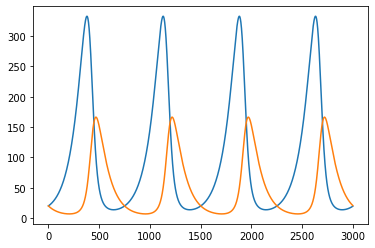

In [ ]:
nt=int((tf-t0)/h)
t = np.arange(nt+1)*h
Nx=np.empty(nt+1)
Nx[0]=20
Ny=np.empty(nt+1)
Ny[0]=20

for step in range(nt):
  x1=a*Nx[step]-(b*Nx[step]*Ny[step])
  y1=-c*Ny[step]+(d*Nx[step]*Ny[step])
  x2=a*x1-b*(x1*Ny[step]+Nx[step]*y1)
  y2=-c*y1+d*(x1*Ny[step]+Nx[step]*y1)
  Nx[step+1]=Nx[step]+(x1*h)+((0.5)*x2*(h**2))
  Ny[step+1]=Ny[step]+(y1*h)+((0.5)*y2*(h**2))

plt.plot(Nx)
plt.plot(Ny)


In [ ]:
def deriv(X,t,a,b,c,d):
  x,y=X
  dotx=x*(a-b*y)
  doty=y*(-c+d*x)
  return np.array([dotx, doty])

In [ ]:
Nt=1000
tmax=30.
t=np.linspace(0.,tmax,Nt)
X0=[Nx[0],Ny[0]]
res = inte.odeint(deriv, X0, t, args=(a,b,c,d))
x,y=res.T

<function matplotlib.pyplot.show(*args, **kw)>

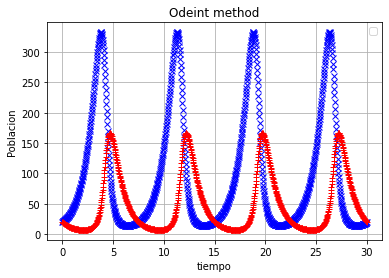

In [ ]:
plt.figure()
plt.grid()
plt.title("Odeint method")
plt.plot(t,x,"xb")
plt.plot(t,y,"+r")
plt.xlabel("tiempo")
plt.ylabel("Poblacion")
plt.legend()
plt.show

Text(0.5, 1.0, 'Pesca')

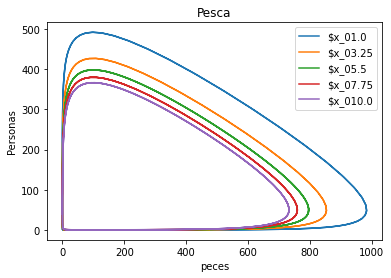

In [ ]:
plt.figure()
IC=np.linspace(1.0,10,5)
for peces in IC:
  X0=[peces,1.0]
  Xs=inte.odeint(deriv,X0,t, args=(a,b,c,d))
  plt.plot(Xs[:,0],Xs[:,1],"-",label="$x_0"+str(X0[0]))
plt.xlabel("peces")
plt.ylabel("Personas")
plt.legend()
plt.title("Pesca")